# AR, MA와 ACF 복습
- 어떤 시계열 데이터가 있을 떄, AR(p) 및 MA(q) 프로세스의 공식으로 ACF를 찾을 수 있음
- 간단한 프로세스에 대해 ACF에서 발생하는 특징적인 모양을 예측할 수 있음
  - MA(q) => ACF는 q lag가 지나면 급격히 줄어 0에 수렴 ("A moving average process of order q has an ACF that cuts off after q lags")


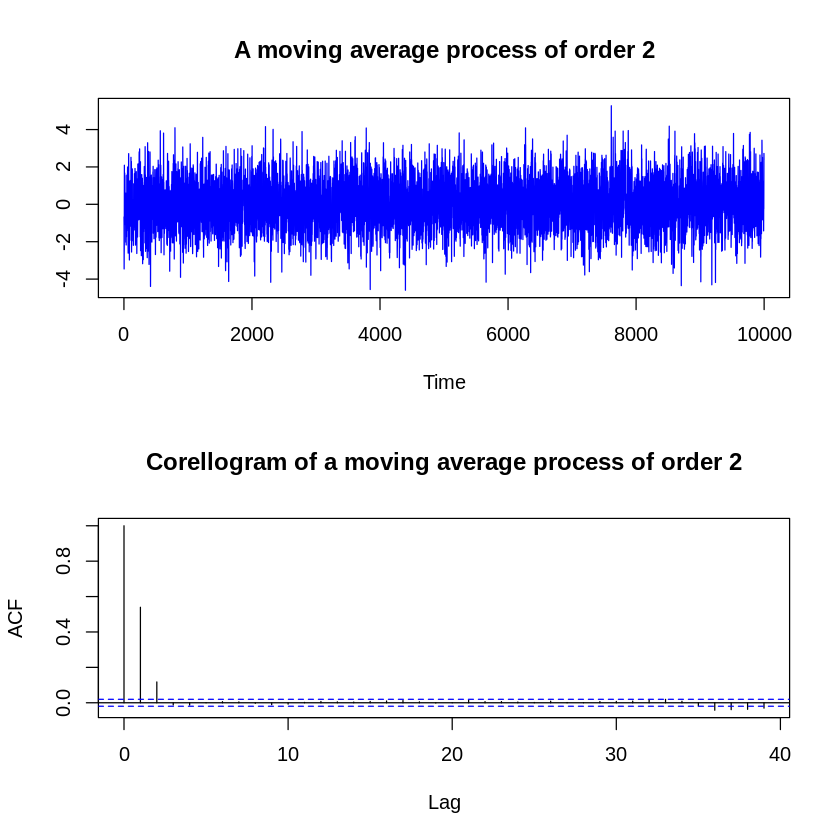

In [4]:
# MA(2) 모형1

noise=rnorm(10000)
ma_2=NULL
for(i in 3:10000){ # 처음 2개 데이터는 세번째 데이터 생성을 위해 사용되므로 세번째부터 시작
  ma_2[i]=noise[i]+0.7*noise[i-1]+0.2*noise[i-2]
  }
moving_average_process=ma_2[3:10000]
moving_average_process=ts(moving_average_process)
par(mfrow=c(2,1))

plot(moving_average_process, main='A moving average process of order 2', ylab=' ', col='blue')
acf(moving_average_process, main='Corellogram of a moving average process of order 2')

- 그렇다면 ACF와 MA(q)와의 관계처럼 그래프를 통해서 AR(q)의 q를 알 수 있는 그래프는 없을까? 
  - PACF가 바로 그것!
  - AR(p) => PACF는 p lag가 지나면 급격히 줄어 0에 수렴 

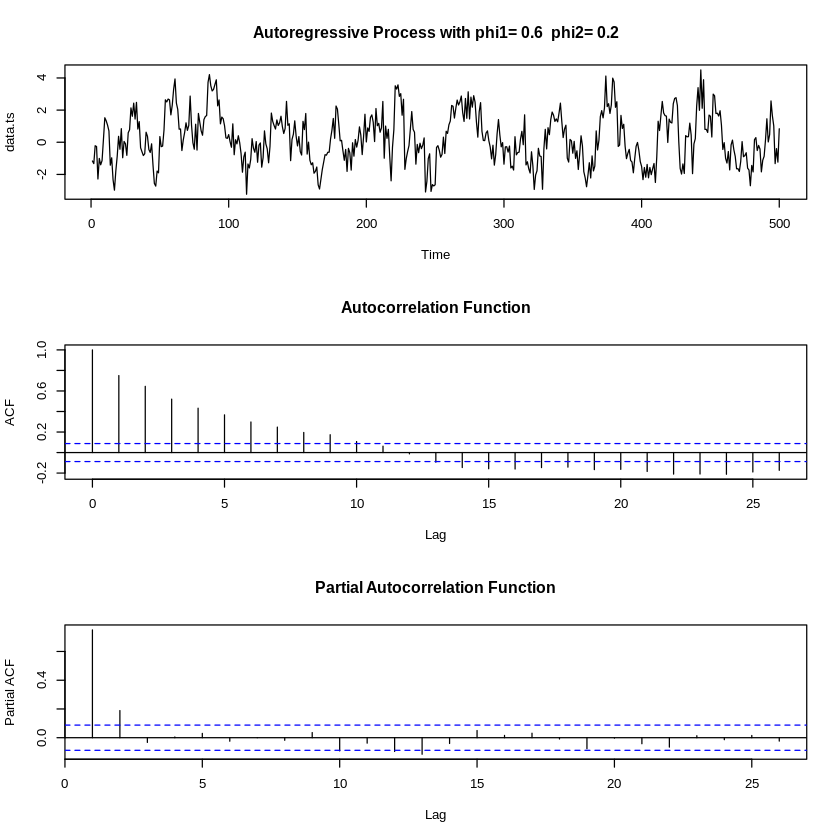

In [1]:
# AR(2) 모형1

par(mfrow=c(3,1))
phi.1=0.6
phi.2=0.2

data.ts=arima.sim(n=500, list(ar=c(phi.1, phi.2)))
plot(data.ts, main=paste("Autoregressive Process with phi1=",phi.1," phi2=",phi.2))
acf(data.ts, main="Autocorrelation Function")
acf(data.ts, type="partial", main="Partial Autocorrelation Function")  # PACF

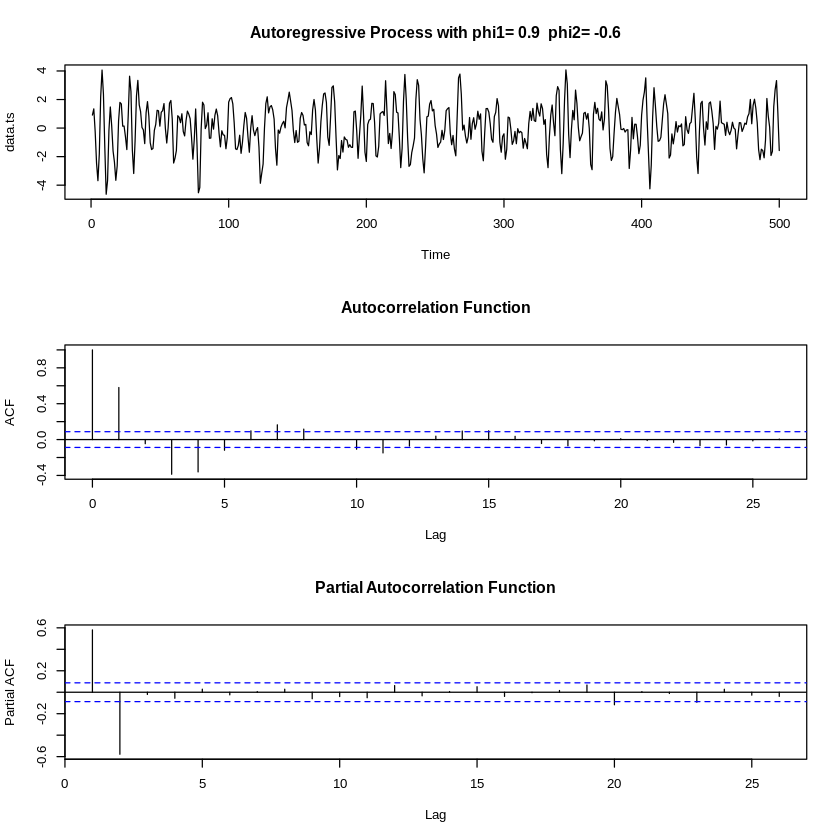

In [3]:
# AR(2) 모형2

phi.1 = 0.9; phi.2 = -0.6;
par(mfrow=c(3,1))

data.ts = arima.sim(n = 500, list(ar = c(phi.1, phi.2)))
plot(data.ts, main=paste("Autoregressive Process with phi1=", phi.1," phi2=",phi.2)) 
acf(data.ts, main="Autocorrelation Function")
acf(data.ts, type="partial", main="Partial Autocorrelation Function")  # PACF)

=> AR series와 ACF 그래프에서는 관계를 찾기 어려우나, PACF를 통해서 알 수 있음

# Beveridge Wheat Price Data Set 

## 'Runtime Type: R' 에서 구글 드라이브 내의 파일 불러오기
- 구글 드라이브 내 파일 우클릭 > 링크생성 > '링크가 있는 모든 사용자'로 변경 > 링크 복사
- 링크 (https://drive.google.com/file/d/1WT3lt_6uYGFc6Ngb6nxijmBSK4Iz3RC9/view?usp=sharing) 중에서 디렉토리(d/) 이후부터 다음 슬레시(/) 전까지의 구글 드라이브 파일 id 가져오기
  - 구글 드라이브 파일 id : 1WT3lt_6uYGFc6Ngb6nxijmBSK4Iz3RC9
- 파일 다운로드 코드 <br>
```system("gdown --id 1WT3lt_6uYGFc6Ngb6nxijmBSK4Iz3RC9") \
data=read.txt("beveridge.txt")```
  - system() : R 콘솔에서 터미널 명령어 사용할 수 있도록 하는 함수
  - gdown : 구글 드라이브에서 다운로드

In [8]:
system("gdown --id 1WT3lt_6uYGFc6Ngb6nxijmBSK4Iz3RC9") # 왼쪽 토글 파일 섹션에 연결된 것 확인 가능

In [10]:
# system() 함수에서 리눅스 명령어 사용 가능
system('ls',TRUE) # 'ls' 리눅스 명령어 - 리스트

[1] "beveridge.txt" "sample_data"

In [11]:
beveridge=read.table("beveridge.txt",header=TRUE)
beveridge

X1500,X17
<int>,<dbl>
1501,19.0
1502,20.0
1503,15.0
1504,13.0
1505,14.0
1506,14.0
1507,14.0
1508,14.0
1509,11.0


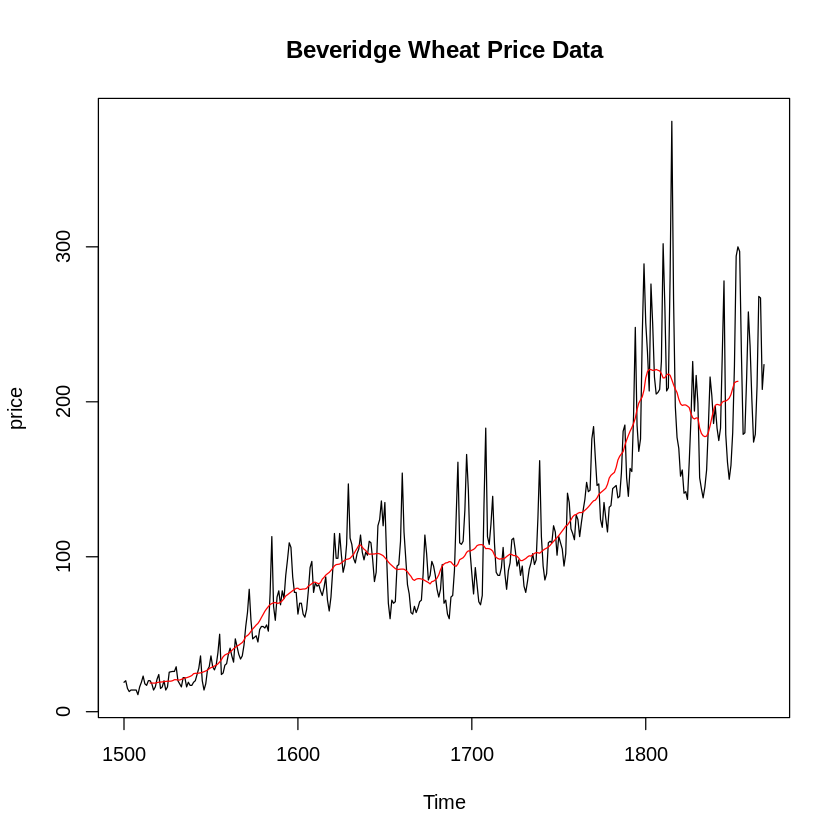

In [15]:
# 두번째 열의 데이터 가져와서 시계열 데이터로 만들기 (1500년부터)
beveridge.ts=ts(beveridge[,2], start=1500)

# 시계열 그래프 그리기
plot(beveridge.ts, ylab='price', main='Beveridge Wheat Price Data')

# MA 그래프 그리기
# 31개 관측치 representation 추출 (절반은 up, 절반은 down) => MA(31)
beveridge.MA=filter(beveridge.ts, rep(1/31,31), sides=2) 
lines(beveridge.MA, col='red')

## PACF

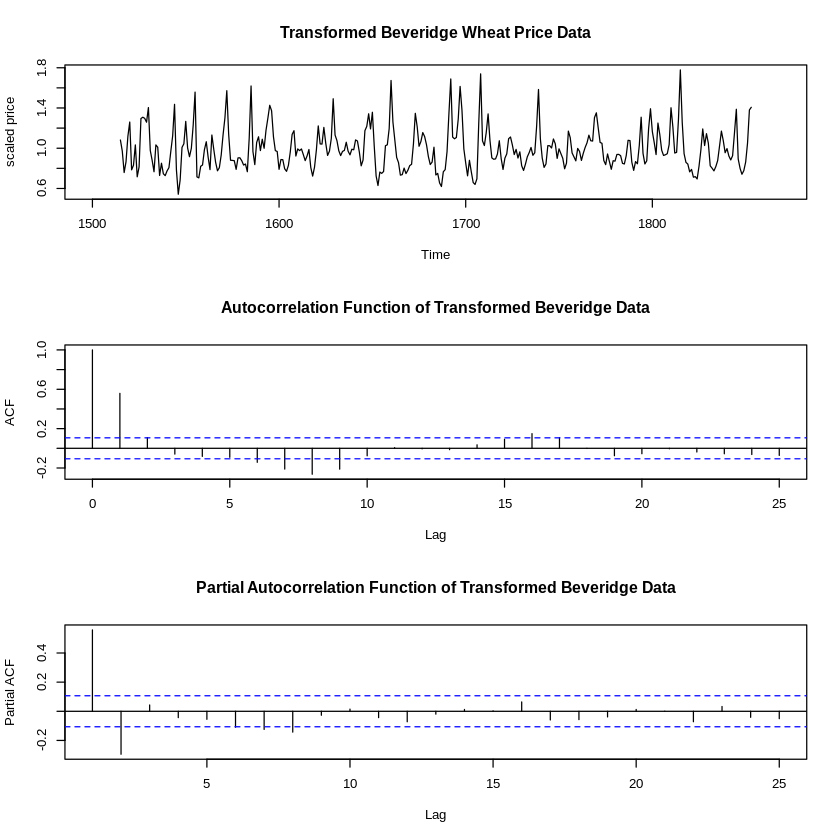

In [16]:
par(mfrow=c(3,1))
Y=beveridge.ts/beveridge.MA # stationary data로 만들기 위해 표준화

plot(Y, ylab='scaled price', main='Transformed Beveridge Wheat Price Data')
acf(na.omit(Y), main='Autocorrelation Function of Transformed Beveridge Data') # 앞31개, 뒤31개 데이터는 na이므로 삭제
acf(na.omit(Y), type='partial', main='Partial Autocorrelation Function of Transformed Beveridge Data')

=> PACF가 시차2 이후 0에 수렴 -> AR(2)으로 보임 

In [17]:
ar(na.omit(Y), order.max=5)


Call:
ar(x = na.omit(Y), order.max = 5)

Coefficients:
      1        2  
 0.7232  -0.2949  

Order selected 2  sigma^2 estimated as  0.027

=> p의 범위를 1~5까지로 설정하고 AR 모델을 계산해보면 coefficients(phi) 2개 도출됨
- 즉, 앞서 그래프에서 유추한 것처럼 AR(2)임을 알 수 있음 

"AR(p) has a PACF that cuts off after p lags."

# PACF 개념, 공식

## isdals 라이브러리 >> bodyfat 데이터셋 
- bodyfat 데이터셋: This dataset provides information on body fat, triceps skinfold thickness, thigh circumference, and mid-arm circumference for twenty healthy females aged 20 to 34.

In [19]:
library()

In [20]:
install.packages("isdals")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [21]:
require(isdals)

Loading required package: isdals



In [23]:
help(bodyfat)

In [25]:
bodyfat

Fat,Triceps,Thigh,Midarm
<dbl>,<dbl>,<dbl>,<dbl>
11.9,19.5,43.1,29.1
22.8,24.7,49.8,28.2
18.7,30.7,51.9,37.0
20.1,29.8,54.3,31.1
12.9,19.1,42.2,30.9
21.7,25.6,53.9,23.7
27.1,31.4,58.5,27.6
25.4,27.9,52.1,30.6
21.3,22.1,49.9,23.2


**변수별 산점도** 

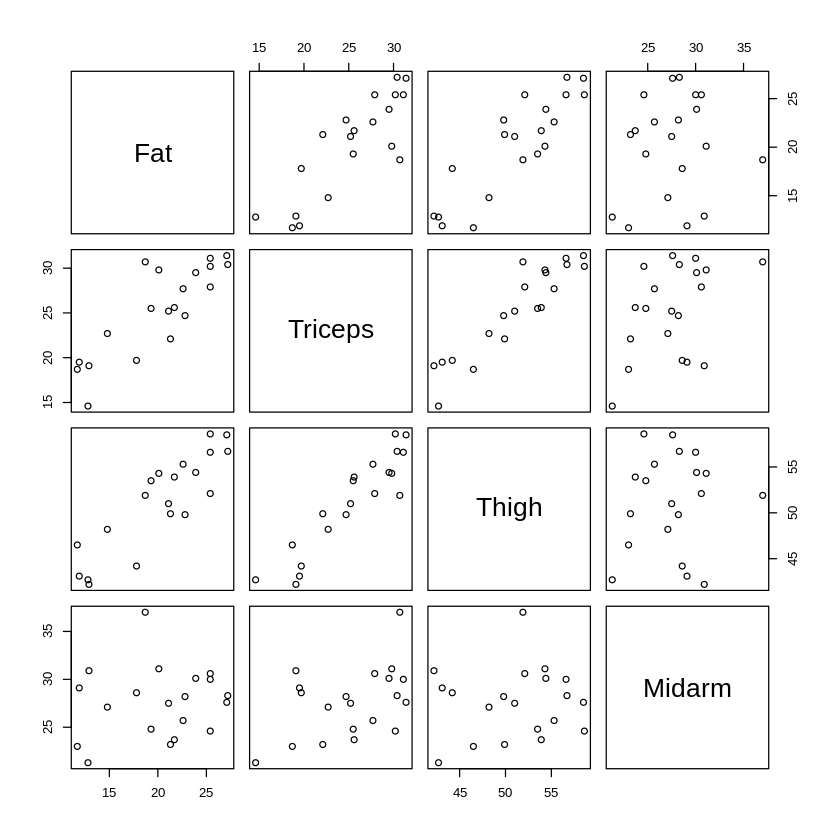

In [26]:
pairs(cbind(Fat,Triceps,Thigh,Midarm))

**변수별 상관계수**

In [27]:
cor( cbind(Fat, Triceps,Thigh,Midarm) )

,Fat,Triceps,Thigh,Midarm
Fat,1.0000000,0.8432654,0.8780896,0.1424440
Triceps,0.8432654,1.0000000,0.9238425,0.4577772
Thigh,0.8780896,0.9238425,1.0000000,0.0846675
Midarm,0.1424440,0.4577772,0.0846675,1.0000000


## Regression Example - partialling out
- Goal: measure the correlation of Fat and Triceps, after controlling for or "*partialling out*" Thigh <br>
목표: 모델에서 Thigh를 통제 즉, "부분 제거"한 후 Fat과 Triceps의 상관관계 측정
- Method : look at the residuals of Fat and Triceps after regressing both of them on Thigh <br>
방법 : Thigh로 Fat과 Triceps를 회귀분석(regression)한 후 Fat과 Triceps의 실제값과의 잔차(residual) 확인 <br>

=> 즉, thigh로는 설명이 불가능한 부분, thigh 영향이 제거된 부분만 가지고 상관관계 확인

In [28]:
Fat.hat=predict(lm(Fat~Thigh)) # linear model (Thigh로 Fat 예측)
Triceps.hat=predict(lm(Triceps~Thigh)) # linear model (Thigh로 Triceps 예측)

# Fat, Triceps 실제값과 예측값의 차 (즉, 잔차)의 상관계수 = 0.17498
cor((Fat-Fat.hat),(Triceps-Triceps.hat)) 

[1] 0.1749822

In [33]:
install.packages("ppcor")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [38]:
library(ppcor)
pcor(cbind(Fat,Triceps,Thigh)) 
# Fat, Triceps 실제값과 Thigh로 예측한 예측값의 차 (즉, 잔차)의 상관계수 = 0.17498

,Fat,Triceps,Thigh
Fat,1.0000000,0.1749822,0.4814109
Triceps,0.1749822,1.0000000,0.7130120
Thigh,0.4814109,0.7130120,1.0000000
,Fat,Triceps,Thigh
Fat,0.00000000,0.4736789763,0.0368987227
Triceps,0.47367898,0.0000000000,0.0006109801
Thigh,0.03689872,0.0006109801,0.0000000000
,Fat,Triceps,Thigh
Fat,0.0000000,0.7327755,2.264597
Triceps,0.7327755,0.0000000,4.192849


In [41]:
pcor(cbind(Fat,Triceps,Thigh,Midarm))
# Fat, Triceps 실제값과 Thigh, Midarm으로 예측한 예측값의 차 (즉, 잔차)의 상관계수 = 0.33815

,Fat,Triceps,Thigh,Midarm
Fat,1.0000000,0.3381500,-0.2665991,-0.3240520
Triceps,0.3381500,1.0000000,0.9963725,0.9955918
Thigh,-0.2665991,0.9963725,1.0000000,-0.9926612
Midarm,-0.3240520,0.9955918,-0.9926612,1.0000000
,Fat,Triceps,Thigh,Midarm
Fat,0.0000000,1.699111e-01,2.848944e-01,1.895628e-01
Triceps,0.1699111,0.000000e+00,1.490492e-18,7.071386e-18
Thigh,0.2848944,1.490492e-18,0.000000e+00,4.134178e-16
Midarm,0.1895628,7.071386e-18,4.134178e-16,0.000000e+00
,Fat,Triceps,Thigh,Midarm


In [42]:
Fat.hat=predict(lm(Fat~Thigh+Midarm)) # linear model (Thigh로 Fat 예측)
Triceps.hat=predict(lm(Triceps~Thigh+Midarm)) # linear model (Thigh로 Triceps 예측)

# Fat, Triceps 실제값과 예측값의 차 (즉, 잔차)의 상관계수 = 0.33815
cor((Fat-Fat.hat),(Triceps-Triceps.hat))  

[1] 0.33815

## Back to AR(p) Processes

- Estimate by looking **backward** over the **last several terms** and denote by $\hat{x}_{x+h}$ the regression of term $\hat{x}_{x+h}$
$$\hat{x}_{t+h}=\beta_1 x_{t+h-1}+\beta_2 x_{t+h-2}+ \dots + \beta_{h-1} x_{t+1}$$
- Estimate by looking **forward** over the **next several terms** and denote by $\hat{x}_{x}$ the regression of term $\hat{x}_{x}$
$$\hat{x}_{t}=\beta_1 x_{t+1}+\beta_2 x_{t+2}+ \dots + \beta_{h-1} x_{t+h-1}$$


## Partial autocorrelation function (PACF) 정의
$$corr[(x_{t+h}-\hat{x}_{t+h}),\ (x_t-\hat{x}_t) ]$$
- Autoregression(AR)로는 설명이 불가능한 부분, 즉 Autoregression(AR) 영향이 제거된 부분만 가지고 현재 시점과 $h$ 시차 후의 자기상관관계 확인